In [506]:
import pandas as pd


with open(r"C:\Users\user\Desktop\glassdoor_data.csv", encoding='utf8', errors= 'ignore') as f:
    data = pd.read_csv(f)
    print(data.head())


   Unnamed: 0         company_name  rating  \
0           0       Kern (Germany)     4.0   
1           1                VIPFY     5.0   
2           2  Contact Air Technik     5.0   
3           3            MENetatis     4.1   
4           4    NEUE HALBERG-GUSS     3.4   

                                             reviews  \
0  {'url': '/Reviews/Kern-Germany-Reviews-E140671...   
1  {'url': '/Reviews/VIPFY-Reviews-E4353306.htm',...   
2  {'url': '/Reviews/Contact-Air-Technik-Reviews-...   
3  {'url': '/Reviews/MENetatis-Reviews-E2867888.h...   
4  {'url': '/Reviews/NEUE-HALBERG-GUSS-Reviews-E9...   

                                            salaries  \
0  {'url': '/Salary/Kern-Germany-Salaries-E140671...   
1  {'url': '/Salary/VIPFY-Salaries-E4353306.htm',...   
2  {'url': '/Salary/Contact-Air-Technik-Salaries-...   
3  {'url': '/Salary/MENetatis-Salaries-E2867888.h...   
4  {'url': '/Salary/NEUE-HALBERG-GUSS-Salaries-E9...   

                                                j

In [507]:
data = data.drop(data.columns[0], axis=1)
data.head()

,company_name,rating,reviews,salaries,jobs,location,size,industry,description
0,Kern (Germany),4.0,{'url': '/Reviews/Kern-Germany-Reviews-E140671...,{'url': '/Salary/Kern-Germany-Salaries-E140671...,{'url': '/Jobs/Kern-Germany-Jobs-E1406719.htm'...,Saarland,1 to 50 Employees,Enterprise Software & Network Solutions,NaN
1,VIPFY,5.0,"{'url': '/Reviews/VIPFY-Reviews-E4353306.htm',...","{'url': '/Salary/VIPFY-Salaries-E4353306.htm',...","{'url': '/Jobs/VIPFY-Jobs-E4353306.htm', 'coun...",Saarland,1 to 50 Employees,NaN,NaN
2,Contact Air Technik,5.0,{'url': '/Reviews/Contact-Air-Technik-Reviews-...,{'url': '/Salary/Contact-Air-Technik-Salaries-...,{'url': '/Jobs/Contact-Air-Technik-Jobs-E53098...,Saarland,Unknown,NaN,NaN
3,MENetatis,4.1,{'url': '/Reviews/MENetatis-Reviews-E2867888.h...,{'url': '/Salary/MENetatis-Salaries-E2867888.h...,"{'url': '/Jobs/MENetatis-Jobs-E2867888.htm', '...",Saarland,Unknown,NaN,NaN
4,NEUE HALBERG-GUSS,3.4,{'url': '/Reviews/NEUE-HALBERG-GUSS-Reviews-E9...,{'url': '/Salary/NEUE-HALBERG-GUSS-Salaries-E9...,{'url': '/Jobs/NEUE-HALBERG-GUSS-Jobs-E935319....,Saarland,1001 to 5000 Employees,Transportation Equipment Manufacturing,NaN


In [508]:
print(data['industry'].unique())

['Enterprise Software & Network Solutions' nan
 'Transportation Equipment Manufacturing' 'Drug & Health Stores'
 'Aerospace & Defense' 'Colleges & Universities' 'Internet & Web Services'
 'Machinery Manufacturing' 'Primary & Secondary Schools'
 'Department, Clothing & Shoe Stores' 'Banking & Lending' 'Grocery Stores'
 'Automotive Parts & Accessories Stores' 'Consumer Product Manufacturing'
 'Electronics Manufacturing' 'Energy & Utilities' 'Municipal Agencies'
 'Information Technology Support Services' 'Education & Training Services'
 'Security & Protective' 'HR Consulting' 'Civic & Social Services'
 'Health Care Services & Hospitals' 'Research & Development'
 'Other Retail Stores' 'Consumer Electronics & Appliances Stores'
 'Biotech & Pharmaceuticals' 'Home Furniture & Housewares Stores'
 'Vehicle Dealers' 'Financial Transaction Processing'
 'Food & Beverage Manufacturing' 'Consumer Product Rental'
 'Taxi & Car Services' 'Gambling' 'National Agencies'
 'Telecommunications Services' 'In

In [509]:
missing_values_count = data.isnull().sum()
print(missing_values_count)
data.shape

company_name      0
rating            0
reviews           0
salaries          0
jobs              0
location          0
size              0
industry        249
description     394
dtype: int64


(608, 9)

In [510]:
#remove empty cells and govermental jobs and other random 'industries'. I kept unis cause they are considered important in clusters
data = data.dropna(subset = ['industry'], axis =0)
data = data[~data['industry'].isin(['Municipal Agencies', 'Primary & Secondary Schools', 'National Agencies', 'Grantmaking & Charitable Foundations'])]
data.shape

(350, 9)

In [511]:

missing_values_count = data.isnull().sum()
print(missing_values_count)
#resetting index
data = data.reset_index(drop=True)

company_name      0
rating            0
reviews           0
salaries          0
jobs              0
location          0
size              0
industry          0
description     151
dtype: int64


In [512]:
data = data[~data['size'].isin(['Unknown'])]
data.shape

(341, 9)

In [513]:
data.head()

,company_name,rating,reviews,salaries,jobs,location,size,industry,description
0,Kern (Germany),4.0,{'url': '/Reviews/Kern-Germany-Reviews-E140671...,{'url': '/Salary/Kern-Germany-Salaries-E140671...,{'url': '/Jobs/Kern-Germany-Jobs-E1406719.htm'...,Saarland,1 to 50 Employees,Enterprise Software & Network Solutions,NaN
1,NEUE HALBERG-GUSS,3.4,{'url': '/Reviews/NEUE-HALBERG-GUSS-Reviews-E9...,{'url': '/Salary/NEUE-HALBERG-GUSS-Salaries-E9...,{'url': '/Jobs/NEUE-HALBERG-GUSS-Jobs-E935319....,Saarland,1001 to 5000 Employees,Transportation Equipment Manufacturing,NaN
2,Müller,3.8,{'url': '/Reviews/M%C3%BCller-Reviews-E934511....,{'url': '/Salary/M%C3%BCller-Salaries-E934511....,"{'url': '/Jobs/M%C3%BCller-Jobs-E934511.htm', ...",Saarland,10000+ Employees,Drug & Health Stores,NaN
3,Ford Motor Company,4.1,{'url': '/Reviews/Ford-Motor-Company-Reviews-E...,{'url': '/Salary/Ford-Motor-Company-Salaries-E...,{'url': '/Jobs/Ford-Motor-Company-Jobs-E263.ht...,Saarland,10000+ Employees,Transportation Equipment Manufacturing,OUR PURPOSE\nWe believe in the power of creati...
4,Diehl,3.6,"{'url': '/Reviews/Diehl-Reviews-E10421.htm', '...","{'url': '/Salary/Diehl-Salaries-E10421.htm', '...","{'url': '/Jobs/Diehl-Jobs-E10421.htm', 'count'...",Saarland,10000+ Employees,Aerospace & Defense,"Diehl or no Diehl? Diehl Stiftung & Co., a div..."


In [514]:
from collections import Counter

tmp = Counter(data['industry'])
tmp

Counter({'Enterprise Software & Network Solutions': 10,
         'Transportation Equipment Manufacturing': 20,
         'Drug & Health Stores': 3,
         'Aerospace & Defense': 3,
         'Colleges & Universities': 5,
         'Internet & Web Services': 9,
         'Machinery Manufacturing': 17,
         'Department, Clothing & Shoe Stores': 16,
         'Banking & Lending': 10,
         'Grocery Stores': 9,
         'Automotive Parts & Accessories Stores': 1,
         'Electronics Manufacturing': 7,
         'Energy & Utilities': 11,
         'Consumer Product Manufacturing': 15,
         'Education & Training Services': 3,
         'Security & Protective': 4,
         'HR Consulting': 16,
         'Civic & Social Services': 6,
         'Health Care Services & Hospitals': 11,
         'Research & Development': 8,
         'Other Retail Stores': 5,
         'Consumer Electronics & Appliances Stores': 4,
         'Biotech & Pharmaceuticals': 6,
         'Home Furniture & Housewares S

<Axes: xlabel='industry'>

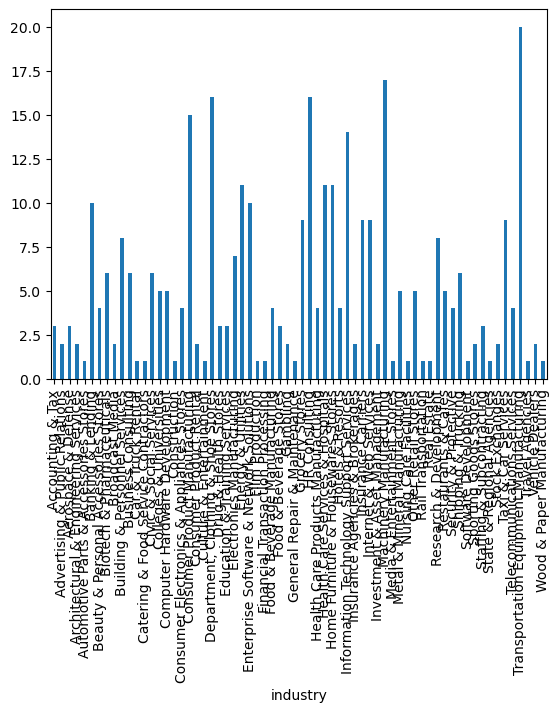

In [515]:
data.groupby("industry").count()["company_name"].plot.bar()

<Axes: >

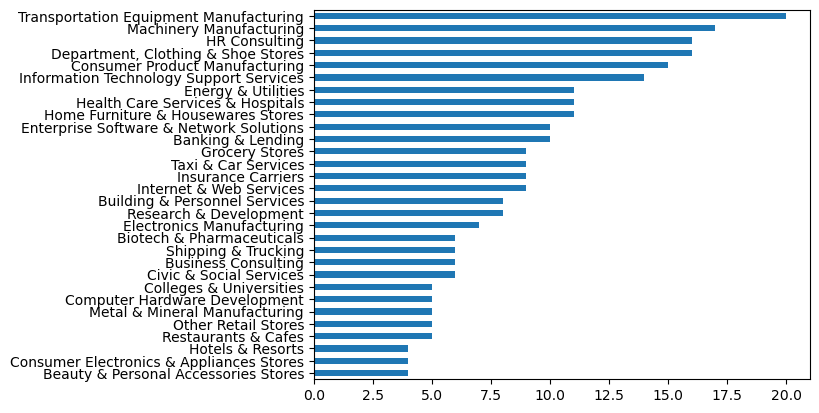

In [516]:
data.industry.value_counts()[:30].sort_values().plot(kind = 'barh')


In [517]:
data.industry.nunique()

66

In [518]:
industry_counts = data['industry'].value_counts()

# Get the industry values that appear at least 10 times
valid_industries = industry_counts[industry_counts >= 10].index

# Filter the dataset based on the valid industries
data = data[data['industry'].isin(valid_industries)]

data.industry.nunique()


11

In [519]:
data.shape

(151, 9)

In [520]:
#get number of companies per remaining  industry
import plotly.express as px
company_count_by_industry = data['industry'].value_counts().reset_index()
company_count_by_industry.columns = ['industry', 'Count']

fig = px.pie(company_count_by_industry, values='Count', names='industry', title='Number of Companies per Industry')

fig.show()
#what I get from this: very diverse economy. The data doesn't suggest a predominent cluster. Saarland doesn't seem to be a one-cluster economy
#btw the total is 99.98% wtf???
# you can click on the name of the industry and temporarily  remove it from the pie chart
#you can hover and see the actual number

In [521]:
#mean of companies in the clusters
mean_companies = data.groupby('industry').size().mean()

print(mean_companies)


13.727272727272727


In [522]:
#get the mean rating by company size

# Calculate the mean rating by size
mean_rating_by_industry = data.groupby('size')['rating'].mean().reset_index()

# Calculate the overall mean rating
overall_mean_rating = data['rating'].mean()

# Create a trace for the mean rating per industry
trace_industry = go.Bar(x=mean_rating_by_industry['rating'], y=mean_rating_by_industry['size'],
                        orientation='h', name='Mean Rating by Size',
                        hovertemplate='%{x:.2f}')

# Create a trace for the overall mean rating
trace_mean = go.Bar(x=[overall_mean_rating], y=['Overall Mean'], orientation='h', name='Overall Mean Rating',
                    hovertemplate='%{x:.2f}')

data_visualization = [trace_industry, trace_mean]

layout = go.Layout(title='Mean Rating by Size',
                   xaxis=dict(title='Mean Rating'),
                   yaxis=dict(title='Size'),
                   barmode='group')

fig = go.Figure(data=data_visualization, layout=layout)

fig.show()
#not sure if useful but here you go!

In [523]:
#mean rating by industry

# Calculate the mean rating by industry
mean_rating_by_industry = data.groupby('industry')['rating'].mean().reset_index()

# Calculate the overall mean rating
overall_mean_rating = data['rating'].mean()

# Create a trace for the mean rating per industry
trace_industry = go.Bar(x=mean_rating_by_industry['rating'], y=mean_rating_by_industry['industry'],
                        orientation='h', name='Mean Rating by Industry',
                        hovertemplate='%{x:.2f}')

# Create a trace for the overall mean rating
trace_mean = go.Bar(x=[overall_mean_rating], y=['Overall Mean'], orientation='h', name='Overall Mean Rating',
                    hovertemplate='%{x:.2f}')

data_visualization = [trace_industry, trace_mean]

layout = go.Layout(title='Mean Rating by Industry',
                   xaxis=dict(title='Mean Rating'),
                   yaxis=dict(title='Industry'),
                   barmode='group')

fig = go.Figure(data=data_visualization, layout=layout)

fig.show()

#what I get: Information Techonology support services is the most well reputed cluster others. As a business you want to be part of this cluster
#opposite can be said for department clothing & shoe stores, Home furniture


In [524]:
#get the composition of Saarland's economy in terms of company size
company_count_by_industry = data['size'].value_counts().reset_index()
company_count_by_industry.columns = ['size', 'Count']

fig = px.pie(company_count_by_industry, values='Count', names='size', title='Size of Companies in Saarland')

fig.show()

#having smaller and bigger companies is important in an ecosystem. Based on this we can argue that Saarland is a booming economy

In [525]:
# Group the data by industry and size, and count the number of companies in each group
company_count_by_industry_size = data.groupby(['industry', 'size']).size().reset_index(name='count')

# Iterate over each unique industry
for industry in data['industry'].unique():
    # Filter the data for the current industry
    industry_data = company_count_by_industry_size[company_count_by_industry_size['industry'] == industry]
    
    # Create a pie chart for the size of companies within the industry
    fig = px.pie(industry_data, values='count', names='size', title=f"Company Size Distribution in {industry}",
                 hover_data=['count'], labels={'count': 'Count'})
    
    fig.update_traces(textinfo='percent+label')
    fig.show()
#clusters are supposed to have small and big companies. They play different roles in clusters and affect the cluster growth differently. Most clusters are diverse

In [526]:
#calculate the diversity of each industry, i.e. how many sizes it contains.
# Calculate the total number of unique sizes across all industry types
total_unique_sizes = data['size'].nunique()

# Calculate the Size Diversity Index for each industry type
industry_diversity_index = data.groupby('industry')['size'].nunique() / total_unique_sizes

# Sort the industry types based on their Size Diversity Index in descending order
industry_diversity_index = industry_diversity_index.sort_values(ascending=False)


print(industry_diversity_index)
# Diverse clusters are better/stronger

industry
HR Consulting                              0.857143
Information Technology Support Services    0.857143
Consumer Product Manufacturing             0.714286
Department, Clothing & Shoe Stores         0.714286
Energy & Utilities                         0.714286
Enterprise Software & Network Solutions    0.714286
Machinery Manufacturing                    0.714286
Transportation Equipment Manufacturing     0.571429
Banking & Lending                          0.428571
Health Care Services & Hospitals           0.428571
Home Furniture & Housewares Stores         0.428571
Name: size, dtype: float64


In [527]:
# Group the data by size and industry, and count the number of companies in each group
company_count_by_size_industry = data.groupby(['size', 'industry']).size().reset_index(name='count')

# Iterate over each unique size
for size in data['size'].unique():
    # Filter the data for the current size
    size_data = company_count_by_size_industry[company_count_by_size_industry['size'] == size]
    
    # Create a pie chart for the distribution of industries within the size category
    fig = px.pie(size_data, values='count', names='industry', title=f"Industry Distribution for Size: {size}",
                 hover_data=['count'], labels={'count': 'Count'})
    
    fig.update_traces(textinfo='percent+label')
    fig.show()


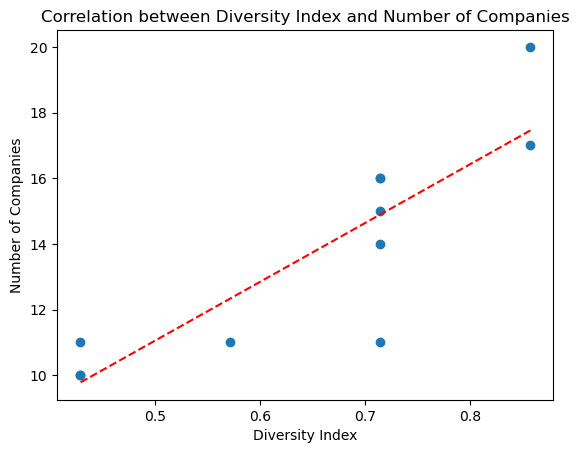

Correlation Coefficient: 0.8637197510124193


In [528]:

import numpy as np


# Calculate the number of companies in each industry
company_count = data['industry'].value_counts()

# Plot the diversity index vs. number of companies
plt.scatter(industry_diversity_index, company_count)
plt.xlabel('Diversity Index')
plt.ylabel('Number of Companies')
plt.title('Correlation between Diversity Index and Number of Companies')

# Add a trendline (optional)
z = np.polyfit(industry_diversity_index, company_count, 1)
p = np.poly1d(z)
plt.plot(industry_diversity_index, p(industry_diversity_index), "r--")

# Show the plot
plt.show()



correlation_coefficient = np.corrcoef(industry_diversity_index, company_count)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)


#chatGPT did this one. The idea is that if industries that are more diverse in terms of size tend to have 
#a greater number of companies because diverse clusters  promote growth. You don't want a cluster with only huge companies.
#you need small companies too
#But this might be just wrong cause one could argue it's the other way around. We have a lot of companies
#and that is why clusters are diverse. So this is probably useless.
#Maybe there is a relation between cluster diversity(in terms of company size) and cluster revenue??
#I'll keep this for now.

In [529]:
#things to explore:
#1. the relationg between rating and location of the companies???
#2. the relation between size and location of the companies!!!!